# Questionário Trabalho prático 3

### 1 - Considerando o desenvolvimento do trabalho prático 3, apresente em anexo a figura que descreve o histograma para o indicador "Inflation, consumer prices (annual %)" para o Brasil, entre os anos de 1990 e 2010.


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,2947.73307,432.786664,951.962053,1927.38079,2075.888398,66.007034,15.757666,6.926713,3.195076,4.858447,...,6.840359,8.450164,14.71492,6.597185,6.869537,4.183568,3.641273,5.678594,4.888035,5.038727


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

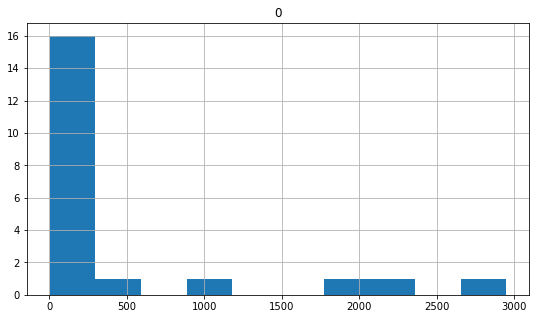

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

caminho: str = '../'
arquivo: str = 'WDIData.csv'

df_completo = pd.read_csv(caminho + arquivo)

filtro_pais: list[str] = ['BRA']
query_pais = '`Country Code` in @filtro_pais'
df_filtrado_pais = df_completo.query(query_pais).reset_index(drop=True)


filtro_indicador: list[str] = ['Inflation, consumer prices (annual %)']
query_indicador = '`Indicator Name` in @filtro_indicador'
df_filtrado_indicador = df_filtrado_pais.query(
    query_indicador).reset_index(drop=True)

# display(df_filtrado_indicador)

# excluindo período que não é entre 1990 e 2010
df_filtrado_periodo = df_filtrado_indicador
for coluna in df_filtrado_indicador:
    # apago colunas não numericas
    if not (coluna.isnumeric()):
        df_filtrado_periodo = df_filtrado_periodo.drop([coluna], axis=1)
    else:
        # apago periodo fora da faixa escolhida
        if(int(coluna) < 1990 or int(coluna) > 2010):
            df_filtrado_periodo = df_filtrado_periodo.drop([coluna], axis=1)

display(df_filtrado_periodo)

df_filtrado_periodo.dropna(axis=1, inplace=True)
df_filtrado_periodo.T.hist(figsize=[9, 5])
